In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import KFold
df = pd.read_csv("data_set.csv")
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [2]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [3]:
df.groupby('label').count()

,title,text
label,,
FAKE,3164,3164
REAL,3171,3171


In [4]:
df[df['label'] == 'REAL']

,title,text,label
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
df[df['label'] == 'FAKE']

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,"Tehran, USA","I’m not an immigrant, but my grandparents are....",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


<AxesSubplot:xlabel='label'>

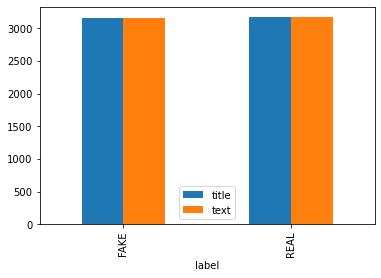

In [6]:
df.groupby('label').count().plot.bar()

([<matplotlib.patches.Wedge at 0x211bdcf9c40>,
 [Text(-1.0999983431305196, -0.0019092171462993539, 'REAL'),
  Text(1.0999983431305196, 0.0019092171462992192, 'FAKE')],
 [Text(-0.5999990962530106, -0.0010413911707087384, '50.06%'),
  Text(0.5999990962530106, 0.0010413911707086649, '49.94%')])

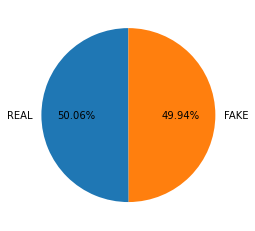

In [7]:
x = [len(df[df['label'] == 'REAL']),len(df[df['label'] == 'FAKE'])]
y = ['REAL', 'FAKE']
plt.pie(x = x, labels = y, autopct='%0.2f%%', startangle=90)

In [8]:
vectorizor = TfidfVectorizer()

In [9]:
features = vectorizor.fit_transform(df['title'])

In [10]:
labels = df['label']

In [11]:
features

<6335x10071 sparse matrix of type '<class 'numpy.float64'>'
	with 63910 stored elements in Compressed Sparse Row format>

In [12]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [13]:
kf = KFold(5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [14]:
for train, test in kf.split(features):
    model = SVC()
    model.fit(features[train],labels.iloc[train])
    prediction = model.predict(features[test])
    print(classification_report(prediction, labels.iloc[test]))

              precision    recall  f1-score   support

        FAKE       0.88      0.81      0.85       689
        REAL       0.79      0.87      0.83       578

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267

              precision    recall  f1-score   support

        FAKE       0.86      0.81      0.83       710
        REAL       0.77      0.84      0.80       557

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

              precision    recall  f1-score   support

        FAKE       0.87      0.78      0.82       662
        REAL       0.79      0.87      0.83       605

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

              preci

In [15]:
sample = pd.DataFrame(['Tighter travel rules, free at home-tests and boosters: Biden unveils COVID-19 winter plan','‘Nightmare Alley’ First Reactions Commend Guillermo del Toro Noir’s ‘Breathtaking’ Production Design, Bradley Cooper’s ‘Career-Best Performance’'],columns = ['title'])
sample

,title
0,"Tighter travel rules, free at home-tests and b..."
1,‘Nightmare Alley’ First Reactions Commend Guil...


In [16]:
simple_tests = vectorizor.transform(sample['title'])

In [17]:
model.predict(simple_tests)

array(['REAL', 'FAKE'], dtype=object)